In [22]:
import numpy as np 
import pandas as pd
import random as rm
import math
import matplotlib.pyplot as plt
# shift + enter to run cells
# python3 -m pip install til at installere moduler

[array([[ 0.00000000e+00,  7.23305958e-02,  1.36127142e-01,
         1.60594629e-01,  1.13514027e-01,  8.94871561e-02,
         1.02546005e-01,  7.15503892e-02,  5.76492976e-02,
         8.22163930e-02,  1.98328699e-02,  1.00024102e-01,
         6.28699574e-02,  4.70953390e-02, -4.09837050e-02,
        -6.50713710e-02, -5.71914412e-02, -5.52382728e-02,
        -5.10902793e-02, -6.22175556e-02, -1.04295310e-01,
        -1.41018913e-01, -1.29316123e-01, -1.75745505e-01],
       [ 0.00000000e+00, -8.62937529e-04, -3.39664474e-02,
        -1.69082375e-02, -1.01673364e-01, -4.04608871e-02,
        -6.97713099e-02, -8.46538354e-02, -7.05465178e-03,
        -3.21127707e-02,  2.13742550e-02, -1.60566209e-02,
        -5.45443054e-02, -1.18986046e-01, -1.32290987e-01,
        -1.04943458e-01, -6.91737114e-02, -1.13486934e-01,
        -1.33986224e-01, -1.58008505e-01, -1.05969877e-01,
         8.53784065e-05, -6.93356433e-02, -1.64072133e-01]]), array([[ 0.        ,  0.08363659,  0.01555419, -0.2

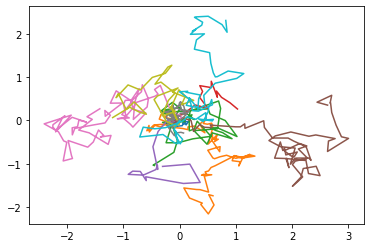

In [38]:
x0 = 0 
y0 = 0
num_tracks = 10
total_tracks = []
track_length = np.random.randint(5,100,size=num_tracks) 
#print(track_length)

D_track = np.random.uniform(low = 10**-3, high = 0.8, size=(num_tracks))
#print(D_track)
# D = np.reshape(np.repeat(D_track,track_length),(num_tracks,track_length))
dt = 1/30 # ca. 36 milli sec irl, kameratid åbent 

tracks = []
for i in range(num_tracks):
    D = D_track[i]
    l = track_length[i]
    #print(D)
    
    two_D_t = 2*D*dt
    # pixel i kameraet = 180 nm, 220 pixels 
    step_x = np.random.normal(loc=0.0, scale=np.sqrt(two_D_t), size=l)
    #print(step_x)
    step_y = np.random.normal(loc=0.0, scale=np.sqrt(two_D_t), size=l)
    #print(step_y)
    
    def sim1 (x,y,step_x,step_y):
        y_f = np.concatenate([[y],np.cumsum(step_y)])
        x_f = np.concatenate([[x],np.cumsum(step_x)])
        return np.array([x_f,y_f])
    
    location = sim1(x0,y0,step_x,step_y)
    tracks.append(location)
    plt.plot(location[0],location[1])   
    
print(tracks)


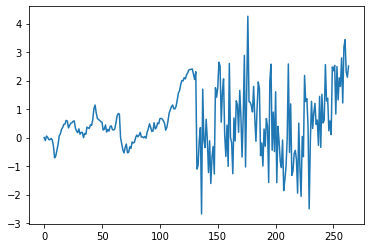

In [39]:
# Spredningen på noise?
x_f = np.array([np.concatenate([[x0],np.cumsum(step_x)])])
y_f = np.array([np.concatenate([[y0],np.cumsum(step_y)])])
x_noise = x_f+np.random.normal(loc=0.0, scale=1.0, size = x_f.shape)
y_noise = y_f+np.random.normal(loc=0.0, scale=1.0, size = y_f.shape)
loc_with_noise = np.append(location, np.array([x_noise,y_noise]))

plt.plot(loc_with_noise)